a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Q2.csv")
df.head(5)

,Favorite Color,Favorite Music Genre,Favorite Soft Drink,Gender
0,Cool,Rock,7UP/Sprite,F
1,Neutral,Hip hop,Coca Cola/Pepsi,F
2,Warm,Rock,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Fanta,F
4,Cool,Rock,Coca Cola/Pepsi,F


b.

In [3]:
# Check for missing values

missing_values = pd.DataFrame({'missing value count': df.isna().sum()})
missing_values

,missing value count
Favorite Color,0
Favorite Music Genre,0
Favorite Soft Drink,0
Gender,0


c.

In [4]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Favorite Color,Favorite Music Genre,Favorite Soft Drink,Gender
0,0,6,0,0
1,1,2,1,0
2,2,6,1,0
3,2,1,2,0
4,0,6,1,0


d.

In [5]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Soft Drink,Gender
count,66.000000,66.000000,66.000000,66.000000
mean,0.772727,3.696970,1.227273,0.500000
std,0.924794,2.060394,0.890902,0.503831
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000
50%,0.000000,4.000000,1.000000,0.500000
75%,2.000000,6.000000,2.000000,1.000000
max,2.000000,6.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Favorite Color        66 non-null     int32
 1   Favorite Music Genre  66 non-null     int32
 2   Favorite Soft Drink   66 non-null     int32
 3   Gender                66 non-null     int32
dtypes: int32(4)
memory usage: 1.2 KB


In [7]:
df.shape

(66, 4)

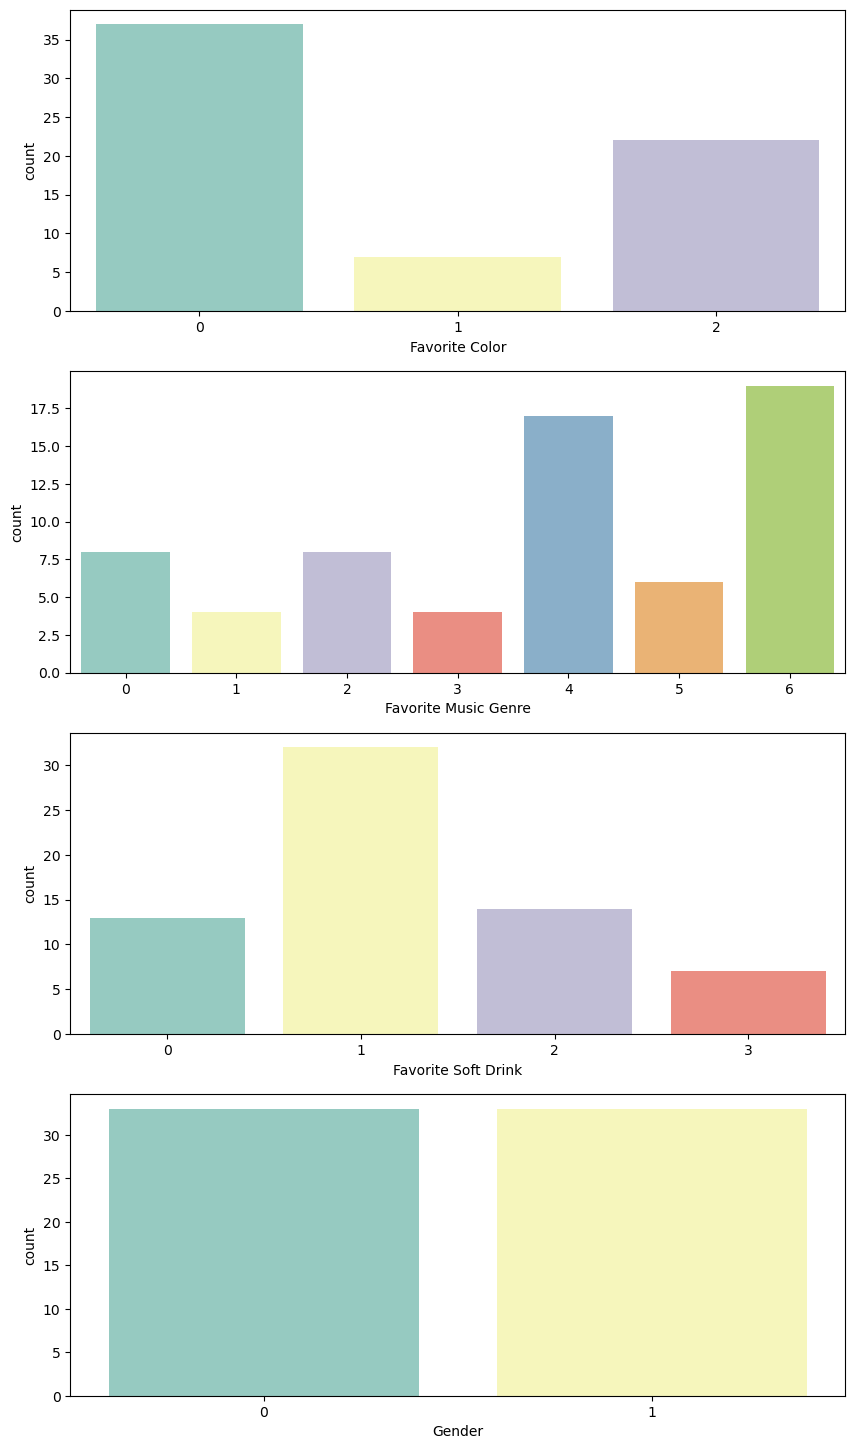

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,18))
for i in range(len(df.columns)):
    sns.countplot(data=df, x=df.iloc[:,i],ax=axes[i], palette='Set3')

<AxesSubplot:xlabel='Favorite Color', ylabel='count'>

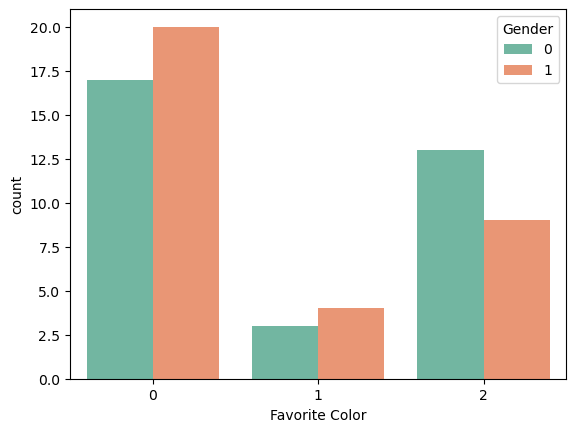

In [9]:
sns.countplot('Favorite Color', hue='Gender', data=df, palette='Set2')

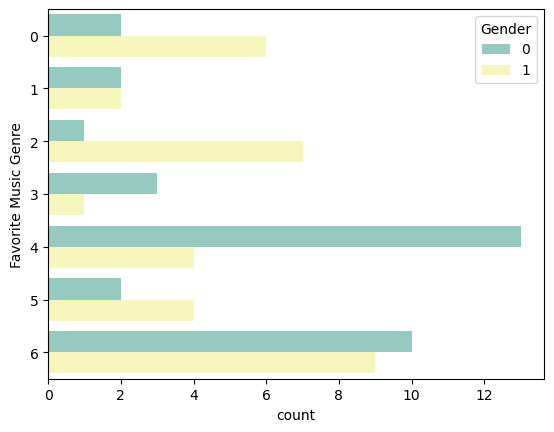

In [10]:
sns.countplot(y='Favorite Music Genre', hue='Gender', data=df, palette='Set3');

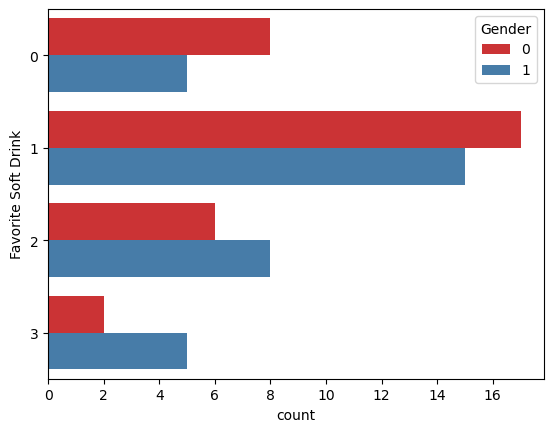

In [11]:
sns.countplot(y='Favorite Soft Drink', hue='Gender', data=df, palette='Set1');

e.

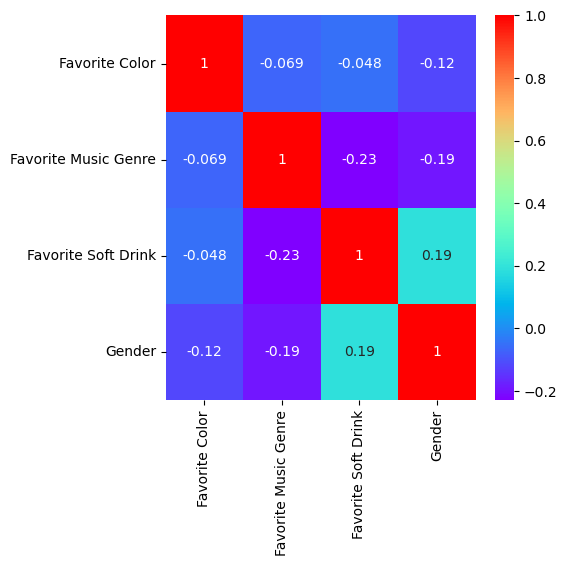

In [12]:
# Correlation Matrix

correlation_mat = df.corr()
corr_features = correlation_mat.index
plt.figure(figsize=(5,5))
g = sns.heatmap(df[corr_features].corr(),annot=True,cmap='rainbow')
plt.show()

f.

In [13]:
X = df.drop('Gender', axis=1)
X.head()

,Favorite Color,Favorite Music Genre,Favorite Soft Drink
0,0,6,0
1,1,2,1
2,2,6,1
3,2,1,2
4,0,6,1


In [14]:
y = df['Gender']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

In [15]:
# Feature scaling

X.describe()

,Favorite Color,Favorite Music Genre,Favorite Soft Drink
count,66.000000,66.000000,66.000000
mean,0.772727,3.696970,1.227273
std,0.924794,2.060394,0.890902
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000
50%,0.000000,4.000000,1.000000
75%,2.000000,6.000000,2.000000
max,2.000000,6.000000,3.000000


In [16]:
columns = X.columns
scaler = StandardScaler()
ms = MinMaxScaler()
# X = ms.fit_transform(X)
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns= [columns])

X.describe()

,Favorite Color,Favorite Music Genre,Favorite Soft Drink
count,6.600000e+01,6.600000e+01,6.600000e+01
mean,1.244796e-16,-6.728624e-17,-7.233271e-17
std,1.007663e+00,1.007663e+00,1.007663e+00
min,-8.419694e-01,-1.808052e+00,-1.388118e+00
25%,-8.419694e-01,-8.299257e-01,-2.570589e-01
50%,-8.419694e-01,1.482010e-01,-2.570589e-01
75%,1.337246e+00,1.126328e+00,8.740004e-01
max,1.337246e+00,1.126328e+00,2.005060e+00


g.

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_clusters = kmeans.fit_predict(X)
if y_clusters[0] != df.Gender[0]:
    for i, label in enumerate(y_clusters):
        if label == 1:
            y_clusters[i] = 0
        else:
            y_clusters[i] = 1
correct_labels = sum(y == y_clusters)
print("Number of correct lables are %d out of %d." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Number of correct lables are 42 out of 66.
Accuracy score: 0.64


In [18]:
df_temp = pd.DataFrame({'Cluster': y_clusters, 'Gender': df.Gender.values})
df_temp.head()

,Cluster,Gender
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


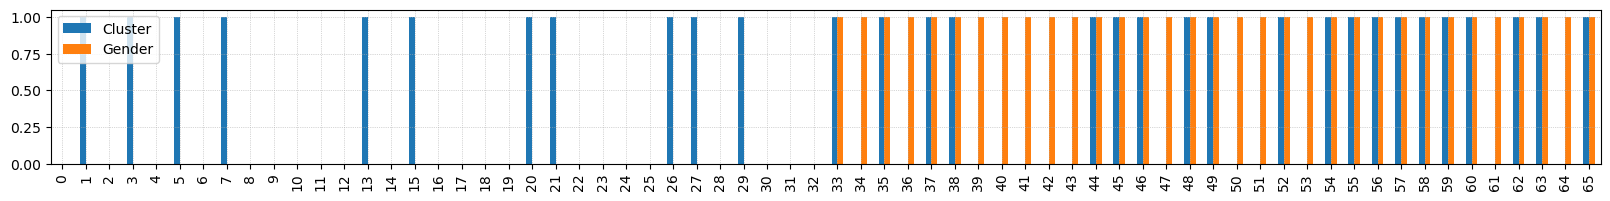

In [19]:
df_temp.plot(kind='bar',figsize=(20,2))
plt.grid(linestyle='-', linewidth='0.5')
plt.grid(linestyle=':', linewidth='0.5')
plt.show()

In [20]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111, projection='3d')
# # ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
# # ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
# for i in range(len(x)):
#     ax.scatter(x[i,0],x[i,1],x[i,2], color = 'blue') 
#     ax.annotate(df.Gender[i], (x[i,0],x[i,1])) 
# ax.set_xlabel('Favorite Color')
# ax.set_ylabel('Favorite Music Genre')
# ax.set_zlabel('Favorite Soft Drink')
# ax.legend()
# plt.show()

In [21]:
print("Silhouette Coefficient: ", silhouette_score(X, y_clusters))
print("Davies Bouldin Score: ", davies_bouldin_score(X, y_clusters))

Silhouette Coefficient:  0.3019434959527358
Davies Bouldin Score:  1.411909925941235


h.

In [22]:
X = df
y = df['Gender']

In [23]:
columns = X.columns
scaler = StandardScaler()
ms = MinMaxScaler()
X = ms.fit_transform(X)
# X=scaler.fit_transform(X)
X = pd.DataFrame(X,columns= [columns])

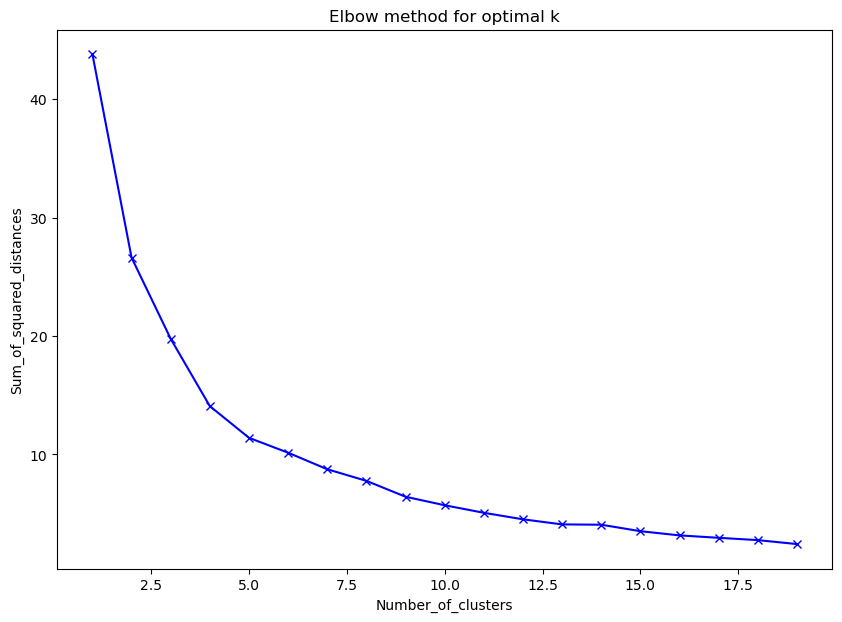

In [24]:
# Using elbow-method to find the best value for our clusters

sum_of_squared_distances = []
K = range(1,20)
for i in K:
    kmeans = KMeans(n_clusters=i,init = 'k-means++')
    model = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.rcParams['figure.figsize'] = [10,7]
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number_of_clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_clusters = kmeans.fit_predict(X)
if y_clusters[0] != df.Gender[0]:
    for i, label in enumerate(y_clusters):
        if label == 1:
            y_clusters[i] = 0
        else:
            y_clusters[i] = 1
correct_labels = sum(y == y_clusters)
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 1.00
